## Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import jit , njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types , pure

## Pure python function

In [18]:
def solve_1d_linearconv_pure(u, un, nt, nx, dt, dx, c):
  for i in range(nt):
    un[:] = u[:]
    for j in range(1,nx):
      u[j] = un[j] - c * dt / dx * (un[j] - un[j-1]) 
  return 0

## Numba accelerator

In [30]:
@jit(fastmath=True)
def solve_1d_linearconv_numba(u, un, nt, nx, dt, dx, c):
  for i in range(nt):
    un[:] = u[:]
    for j in range(1,nx):
      u[j] = un[j] - c * dt / dx * (un[j] - un[j-1])
  return 0

## Pyccel accelerator

In [31]:
@types('float[:]','float[:]','int', 'int','float','float','float')
def solve_1d_linearconv_pyccel(u, un, nt, nx, dt, dx, c):
  for i in range(nt):
    for j in range(nx):
      un[j] = u[j]
    for j in range(1,nx):
      u[j] = un[j] - c * dt / dx * (un[j] - un[j-1])
  return 0

## Inputs

Text(0.5, 1.0, '1D Linear Convection')

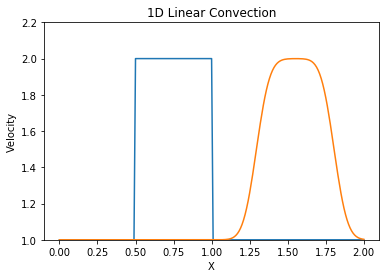

In [34]:
nx = 201  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 200    #nt is the number of timesteps we want to calculate
c = 1.      #assume wavespeed of c = 1
dt = 0.004
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_linearconv_pure(u, un, nt, nx, dt, dx, c)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')

### <font color='red'> There is no physical diffusion in this case, the smoothness of the orange curve is due to the numerical diffusion
---

## Call Funtions

### Pure function

In [22]:
%timeit solve_1d_linearconv_pure(u, un, nt, nx, dt, dx, c)

34.4 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Function with numba accelerator

In [23]:
%timeit solve_1d_linearconv_numba(u, un, nt, nx, dt, dx, c)

17.8 µs ± 6.19 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [24]:
solve_1d_linearconv_f90 = epyccel(solve_1d_linearconv_pyccel)

In [25]:
%timeit solve_1d_linearconv_f90(u, un, nt, nx, dt, dx, c)

28.4 µs ± 857 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
